
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Mar 13, 2020)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
    * (b) the point estimate **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
    * (c) the margin of error. **-3 if wrong or not attempted, -1.5 if figure is right but there's a typo**
   
**If none of the 3 questions in 2 is solved, but the code generates the right plot, -10**
**If 1000 samples were used instead of 10000, but everything else is done correctly, -7 because (b) will be right**

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

largepoll = pd.read_csv('poll-larger.csv')
largepoll['vote'].value_counts(normalize=True)

Orgeron    0.5181
Saban      0.4819
Name: vote, dtype: float64

In [24]:
def sample(orgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < orgeronWinPercent,'Orgeron','Saban')})
s = sample(0.5181,n=1000)
s['vote'].value_counts(normalize=True)

Orgeron    0.521
Saban      0.479
Name: vote, dtype: float64

In [25]:
distDF = pd.DataFrame([sample(0.5181)['vote'].value_counts(normalize=True) for i in range(1000)])
def samplingdist(orgeronWinPercent,n=10000):
    return pd.DataFrame([sample(orgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(orgeronWinPercent,n=10000):
    distDF = samplingdist(orgeronWinPercent,n)
    return distDF['Orgeron'].quantile(0.025), distDF['Orgeron'].quantile(0.975)
quantiles(0.5181)

(0.5079975, 0.5274025)

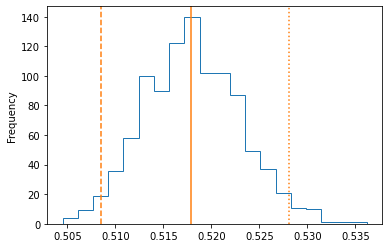

In [26]:
distDF = samplingdist(0.5181,10000)
distDF['Orgeron'].plot(kind='hist', histtype='step',bins=20)
plt.axvline(distDF['Orgeron'].quantile(0.025), c='C1',linestyle='--')
plt.axvline(distDF['Orgeron'].quantile(0.500), c='C1')
plt.axvline(distDF['Orgeron'].quantile(0.975), c='C1',linestyle=':')

In [27]:
quantiles(0.5181,10000)

(0.5076, 0.5277)

In [22]:
#The 95% confidence interval is: [0.508,0.528]
#Point Estimate = 0.5181 +/- 0.01 (at 95% confidence)
#The margin of error lies within 1% when we use a sample size of 10,000.